In [85]:
import os
import re
import emoji
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


sw = stopwords.words("english")

In [5]:
# Data Location
data_location = "/ads-509-final/"

movies_folder = "movies/"


# EDA

## *Movie*

In [16]:
# View a sample of review
review_file= "2Fast2Furious_review_df.csv"
df = pd.read_csv(movies_folder + review_file )
df.head(2)

,Unnamed: 0,name,movie_title,review_title,review,rating,date_place
0,0,Not bad at all,2 Fast 2 Furious,Love this movie,Truly one of my faves. It’s a must watch if yo...,5.0,"Reviewed in the United States 🇺🇸 on May 11, 2023"
1,1,Coleman,2 Fast 2 Furious,Fast n furious,I LOVE ALL THEIR MOVIES LOL,5.0,"Reviewed in the United States 🇺🇸 on May 16, 2023"
2,2,Jack Pocock,2 Fast 2 Furious,American Masterpiece,If you didn't enjoy this movie--- you're wrong...,5.0,"Reviewed in the United States 🇺🇸 on April 28, ..."
3,3,Tina,2 Fast 2 Furious,Satisfied,Kids love these movies,5.0,"Reviewed in the United States 🇺🇸 on April 25, ..."
4,4,N.Maletich,2 Fast 2 Furious,Classic,Will always live in my heart forever and be on...,5.0,"Reviewed in the United States 🇺🇸 on March 22, ..."


In [15]:
# View a sample of movie discription
df = pd.read_csv('md_df.csv')
df.head(2)

,Unnamed: 0,title,imbd_rating,amazon_rating,review_count,runtime,year,rating,price
0,0,The Super Mario Bros. Movie,7.2,4.8,"1,862",1 h 32 min,2023,PG,24
1,1,John Wick: Chapter 4 - Bonus X-Ray Edition,8.0,4.3,707,2 h 49 min,2023,R,19
2,2,John Wick: Chapter 4,8.0,4.3,707,2 h 49 min,2023,18+,19
3,3,65,5.4,3.9,"3,396",1 h 32 min,2023,13+,5
4,4,Dungeons & Dragons: Honor Among Thieves,7.3,4.5,"2,116",2 h 17 min,2023,PG-13,5
5,5,Spider-Man: Into the Spider-Verse,8.4,4.8,"57,097",1 h 56 min,2018,PG,4
6,6,Creed III,6.9,4.6,"5,545",1 h 57 min,2023,PG-13,5
7,7,Guy Ritchie's The Covenant,7.5,4.8,581,2 h 3 min,2023,R,19
8,8,Avatar: The Way of Water,7.7,4.7,"13,582",3 h 13 min,2022,PG-13,19
9,9,Cocaine Bear,6.0,3.9,"5,922",1 h 35 min,2023,R,5


In [14]:
# View a sample of links
df = pd.read_csv('mref.csv')
df.head(2)

,Unnamed: 0,title,hrefs,rhrefs
0,0,The Super Mario Bros. Movie,https://www.amazon.com/Super-Mario-Bros-Movie/...,https://www.amazon.com/product-reviews/B0BXDGV...
1,1,John Wick: Chapter 4 - Bonus X-Ray Edition,https://www.amazon.com/John-Wick-Chapter-Bonus...,https://www.amazon.com/product-reviews/B0BX9MZ...
2,2,John Wick: Chapter 4,https://www.amazon.com/placeholder_title-John-...,https://www.amazon.com/product-reviews/B0B6QNS...
3,3,65,https://www.amazon.com/65-Adam-Driver/dp/B0B8T...,https://www.amazon.com/product-reviews/B0B8TVD...
4,4,Dungeons & Dragons: Honor Among Thieves,https://www.amazon.com/Dungeons-Dragons-Honor-...,https://www.amazon.com/product-reviews/B0B693Q...


In [21]:
# #Print out how review count in each file
# for file_name in os.listdir(movies_folder):
#     if file_name.endswith('.csv'):
#         # Path to the CSV file
#         file_path = os.path.join(movies_folder, file_name)

#         # Read the CSV file into a DataFrame
#         df = pd.read_csv(file_path)

#         # Print the head of the DataFrame
#         print(df.shape)

### Combine the movie reviews

In [38]:
# Create an empty list to store the review dataframes
dfs = []

# Iterate over each file in the folder
for file_name in os.listdir(movies_folder):
    if file_name.endswith('.csv'):
        # Path to the CSV file
        file_path = os.path.join(movies_folder, file_name)

        # Read the CSV file into a datadrame
        df = pd.read_csv(file_path)

        # Append the dataframe to the list
        dfs.append(df)

# Combine the dataframes into a single dataframe
combined_data = pd.concat(dfs, ignore_index=True)
print(combined_data.shape)
combined_data.head()

(22889, 7)


,Unnamed: 0,name,movie_title,review_title,review,rating,date_place
0,0,John's Horror Corner,Knock at the Cabin,Wonderful characters making heart-wrenching mo...,"I’ve always been a Shyamalan fan, and this is ...",4.0,"Reviewed in the United States 🇺🇸 on March 17, ..."
1,1,Sue E. Ramsey,Knock at the Cabin,Different.,"This movie really makes you think about the ""w...",4.0,"Reviewed in the United States 🇺🇸 on May 24, 2023"
2,2,Tramaine Montell Ford ✪ (Tramaine Montell) 🎶,Knock at the Cabin,"I don't care for the horror genre, but I loved...","I watched this movie 4 times. 3 times alone, a...",5.0,"Reviewed in the United States 🇺🇸 on May 18, 2023"
3,3,FAITHANNE CRANE,Knock at the Cabin,Good acting,This is another end of the world movies. I fou...,4.0,"Reviewed in the United States 🇺🇸 on May 11, 2023"
4,4,Alyce,Knock at the Cabin,Worth watching,Pretty decent movie,4.0,"Reviewed in the United States 🇺🇸 on May 29, 2023"


count    22889.000000
mean         4.207349
std          1.353887
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64


<AxesSubplot:>

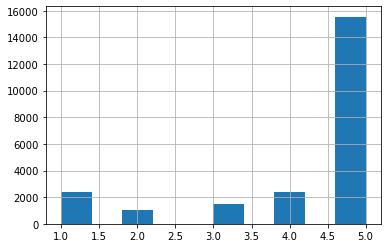

In [25]:
# Calculate statistics on the review ratings
rating_stats = combined_data['rating'].describe()
print(rating_stats)

# Visualize the distribution of ratings
combined_data['rating'].hist()

This makes sense since these are the top 50 movies, so we're expecting to have more of high rating

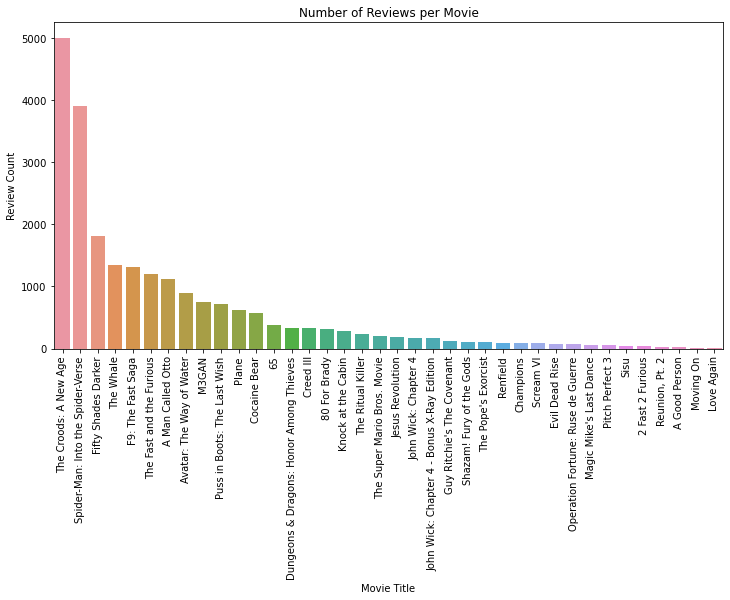

In [28]:
# Calculate the number of reviews per movie
review_count = combined_data['movie_title'].value_counts()

# Visualize the review count by movie
plt.figure(figsize=(12, 6))
sns.barplot(x=review_count.index, y=review_count.values)
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Review Count')
plt.title('Number of Reviews per Movie')
plt.show()

count    22889.000000
mean        28.626546
std         55.730760
min          1.000000
25%          5.000000
50%         14.000000
75%         30.000000
max       1711.000000
Name: review_length, dtype: float64


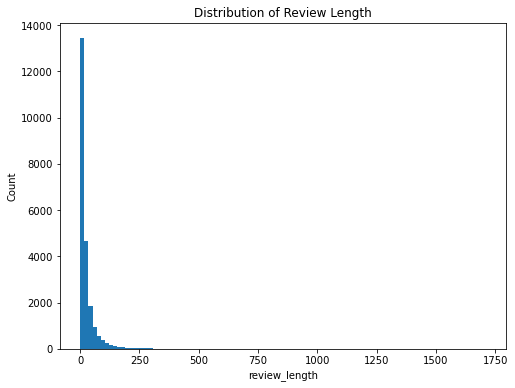

In [40]:
# create title  length column
combined_data['review_length'] = combined_data['review'].apply(lambda x: len(str(x).split()))

# Calculate statistics on the review length
review_length_stats = combined_data['review_length'].describe()
print(review_length_stats)

# Visualize the distribution of review length
plt.figure(figsize=(8, 6))
plt.hist(combined_data['review_length'], bins=100)
plt.xlabel('review_length')
plt.ylabel('Count')
plt.title('Distribution of Review Length')
plt.show()

count    22889.000000
mean         3.443619
std          2.718256
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         27.000000
Name: review_title_length, dtype: float64


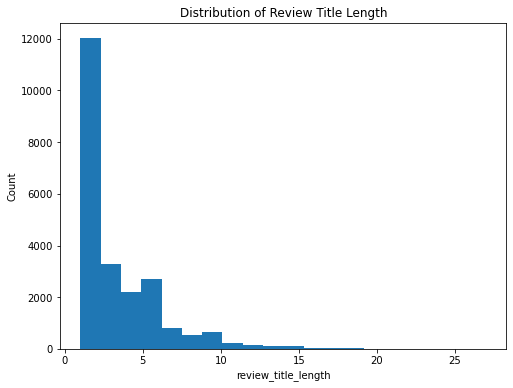

In [43]:
# create review_title length column
combined_data['review_title_length'] = combined_data['review_title'].apply(lambda x: len(str(x).split()))

# Calculate statistics on the review_title length 
rtitle_length_stats = combined_data['review_title_length'].describe()
print(rtitle_length_stats)

# Visualize the distribution of review_title length 
plt.figure(figsize=(8, 6))
plt.hist(combined_data['review_title_length'], bins=20)
plt.xlabel('review_title_length')
plt.ylabel('Count')
plt.title('Distribution of Review Title Length')
plt.show()

In [54]:

# Function to clean and tokenize the lyrics
punctuation = set(punctuation) 
def clean_tokenize(text):
    if text is None or isinstance(text, float):
        return []
    # Remove punctuation
    text = ''.join([c for c in text if c not in punctuation])
    # Tokenize the text
    tokens = text.split()
    # Convert tokens to lowercase
    tokens = [token.lower() for token in tokens]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

# Function Basic Descriptive Statistics
def descriptive_stats(tokens, num_tokens=5, verbose=True):
    """
    Given a list of tokens, calculate and print the number of tokens, number of unique tokens,
    number of characters, lexical diversity, and the most common tokens. Return a list with
    the calculated statistics.
    """
    # Filter out float values
    tokens = [token for token in tokens if not isinstance(token, float)]
    
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    num_characters = sum(len(token) for token in tokens)
    lexical_diversity = num_unique_tokens / num_tokens
    
    if verbose:
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
        
        # Print the 5 most common tokens
        common_tokens = Counter(tokens).most_common(num_tokens)
        print("The most common tokens are:")
        for token, count in common_tokens[:5]: #print out 5 most common token
            print(f"{token}: {count}")
    
    return [num_tokens, num_unique_tokens, lexical_diversity, num_characters]

In [51]:
# Apply the cleaning and tokenization function to the review column
combined_data['rtokens'] = combined_data['review'].apply(clean_tokenize)
combined_data.head()

,Unnamed: 0,name,movie_title,review_title,review,rating,date_place,review_length,review_title_length,rtokens
0,0,John's Horror Corner,Knock at the Cabin,Wonderful characters making heart-wrenching mo...,"I’ve always been a Shyamalan fan, and this is ...",4.0,"Reviewed in the United States 🇺🇸 on March 17, ...",554,9,"[i’ve, always, shyamalan, fan, exactly, brand,..."
1,1,Sue E. Ramsey,Knock at the Cabin,Different.,"This movie really makes you think about the ""w...",4.0,"Reviewed in the United States 🇺🇸 on May 24, 2023",53,1,"[movie, really, makes, think, ever, make, deci..."
2,2,Tramaine Montell Ford ✪ (Tramaine Montell) 🎶,Knock at the Cabin,"I don't care for the horror genre, but I loved...","I watched this movie 4 times. 3 times alone, a...",5.0,"Reviewed in the United States 🇺🇸 on May 18, 2023",91,11,"[watched, movie, 4, times, 3, times, alone, on..."
3,3,FAITHANNE CRANE,Knock at the Cabin,Good acting,This is another end of the world movies. I fou...,4.0,"Reviewed in the United States 🇺🇸 on May 11, 2023",42,2,"[another, end, world, movies, found, parts, qu..."
4,4,Alyce,Knock at the Cabin,Worth watching,Pretty decent movie,4.0,"Reviewed in the United States 🇺🇸 on May 29, 2023",3,2,"[pretty, decent, movie]"


In [55]:
# Descriptive_stats for the movie reviews
descriptive_stats(combined_data['rtokens'].explode().tolist())

There are 352025 tokens in the data.
There are 25811 unique tokens in the data.
There are 1985277 characters in the data.
The lexical diversity is 0.073 in the data.
The most common tokens are:
movie: 16400
great: 5183
good: 4459
one: 3213
watch: 3146


[352025, 25811, 0.07332149705276614, 1985277]

### Word Cloud

In [120]:
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

#     wc = WordCloud(width=800, height=400, 
#                    background_color= "black", colormap="Paired", 
#                    max_font_size=150, max_words=max_words)
    #font_path = os.path.abspath('/Users/lamnguyen/Library/Group Containers/\
    #UBF8T346G9.Office/FontCache/4/CloudFonts/Libre Franklin/18949476423.ttf')
  
    wc = WordCloud(width=800, height=400, background_color="black", 
                   colormap="Paired", max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

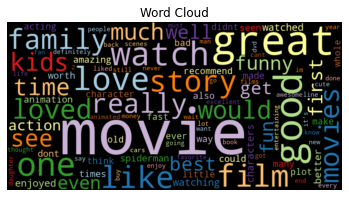

In [122]:
#rtokens_lst = combined_data['rtokens'].explode().tolist()
word_freq = count_words(combined_data, column='rtokens', min_freq=2)
wordcloud(word_freq['freq'], title='Word Cloud', max_words=100)
plt.show()

#### Explore review topic for fun

In [110]:
import pyLDAvis
import pyLDAvis.lda_model
import pyLDAvis.gensim_models
from spacy.lang.en.stop_words import STOP_WORDS as stopwords


In [83]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))

In [124]:
# Filter out np.nan values from the 'review' column
filtered_reviews = combined_data['review'].fillna('')

# Create a document-term matrix using CountVectorizer
vectorizer = CountVectorizer(stop_words=list(stopwords), min_df=5, max_df=0.7)
rmatrix = vectorizer.fit_transform(filtered_reviews)

# Run LDA model
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_para_matrix = lda.fit_transform(rmatrix)
lda_matrix_comp = lda.components_



In [ ]:
display_topics(lda, vectorizer.get_feature_names_out())

In [104]:
lda_para_matrix.sum(axis=0)/lda_para_matrix.sum()*100.0

array([32.91528312,  6.40871186, 23.24131937, 26.22882401, 11.20586165])

In [123]:
# lda_display = pyLDAvis.sklearn.prepare(lda, rmatrix, vectorizer, sort_topics=False)
# pyLDAvis.display(lda_display)